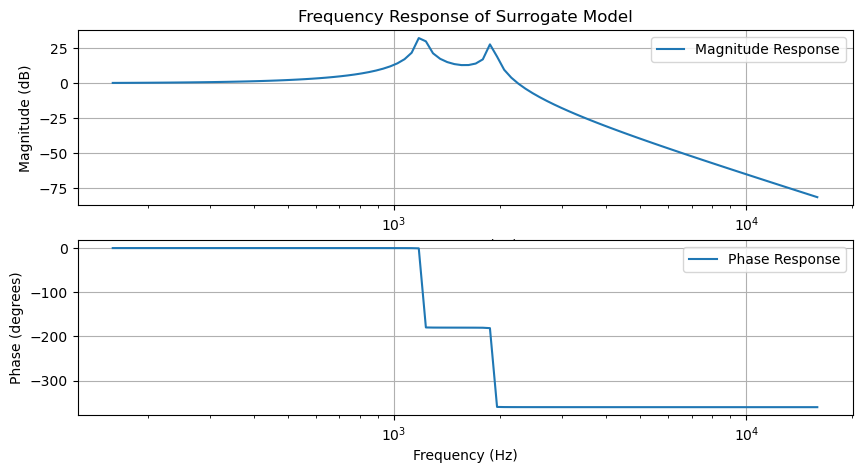

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

class SurrogateCrankshaftModel:
    def __init__(self, freqs, dampings):
        """Initialize surrogate model with dominant natural frequencies and damping ratios."""
        self.freqs = np.array(freqs)  # Natural frequencies in Hz
        self.omegas = 2 * np.pi * self.freqs  # Convert to rad/s
        self.dampings = np.array(dampings)  # Damping ratios
        self.system = self.create_transfer_function()
    
    def create_transfer_function(self):
        """Create a surrogate transfer function model for the crankshaft with multiple modes."""
        num = np.zeros(3)
        den = np.array([1.0])
        
        for omega_n, zeta in zip(self.omegas, self.dampings):
            mode_num = np.array([omega_n**2])
            mode_den = np.array([1, 2*zeta*omega_n, omega_n**2])
            
            if len(den) == 1:
                num, den = mode_num, mode_den
            else:
                num = np.convolve(num, mode_num)
                den = np.convolve(den, mode_den)
        
        return signal.TransferFunction(num, den)
    
    def plot_frequency_response(self):
        """Plot the frequency response of the surrogate model."""
        w, mag, phase = signal.bode(self.system)
        
        plt.figure(figsize=(10, 5))
        plt.subplot(2, 1, 1)
        plt.semilogx(w / (2 * np.pi), mag, label='Magnitude Response')
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude (dB)")
        plt.title("Frequency Response of Surrogate Model")
        plt.legend()
        plt.grid()
        
        plt.subplot(2, 1, 2)
        plt.semilogx(w / (2 * np.pi), phase, label='Phase Response')
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Phase (degrees)")
        plt.legend()
        plt.grid()
        
        plt.show()

# Example Usage
natural_freqs = [1200, 1900]  # Dominant natural frequencies in Hz
damping_ratios = [0.0002, 0.0003]  # Estimated damping for each mode

surrogate = SurrogateCrankshaftModel(natural_freqs, damping_ratios)
surrogate.plot_frequency_response()